# Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Импорт предобработанных данных

In [3]:
!git clone https://github.com/usmaxnik-rgb/VKR_UMN_Modul_Predict

Cloning into 'VKR_UMN_Modul_Predict'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 56 (delta 26), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 16.50 MiB | 11.93 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [4]:
X_united_full=pd.read_excel('/content/VKR_UMN_Modul_Predict/X_united_full.xlsx', index_col='Index')

# Разбиение на тренировочную и тестовую выборки

In [5]:
y=np.array(X_united_full['Соотношение матрица-наполнитель'])
X=np.array(X_united_full.drop('Соотношение матрица-наполнитель', axis=1))

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(812, 12)
(812,)
(203, 12)
(203,)


# Нормализация данных

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание модели нейронной сети

In [7]:
model = Sequential()


# Входной слой + первый скрытый
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))


# Второй скрытый слой
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))


# Третий скрытый слой
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))


# Выходной слой (регрессия)
model.add(Dense(1, activation='linear'))


# Компиляция модели
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Обучение модели с ранней остановкой

In [8]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.9517 - mae: 2.2224 - val_loss: 2.1419 - val_mae: 1.2548
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4611 - mae: 1.2816 - val_loss: 1.6501 - val_mae: 1.0748
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0352 - mae: 1.1921 - val_loss: 1.4222 - val_mae: 0.9930
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0315 - mae: 1.1660 - val_loss: 1.3844 - val_mae: 0.9840
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6942 - mae: 1.0370 - val_loss: 1.3717 - val_mae: 0.9764
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5572 - mae: 1.0112 - val_loss: 1.1491 - val_mae: 0.8834
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8035 - mae: 1.0981 - val_loss: 1.4698 - val_mae: 1.0205
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5081 - mae: 0.9889 - val_loss: 1.0906 - val_mae: 0.8562
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.606

# Предсказание на тестовой выборке

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Метрики качества модели:
MAE (Средняя абсолютная ошибка):      0.6620
MSE (Средняя квадратичная ошибка):       0.7108
RMSE (Корень из MSE):                  0.8431
R² (Коэффициент детерминации):         -0.0633


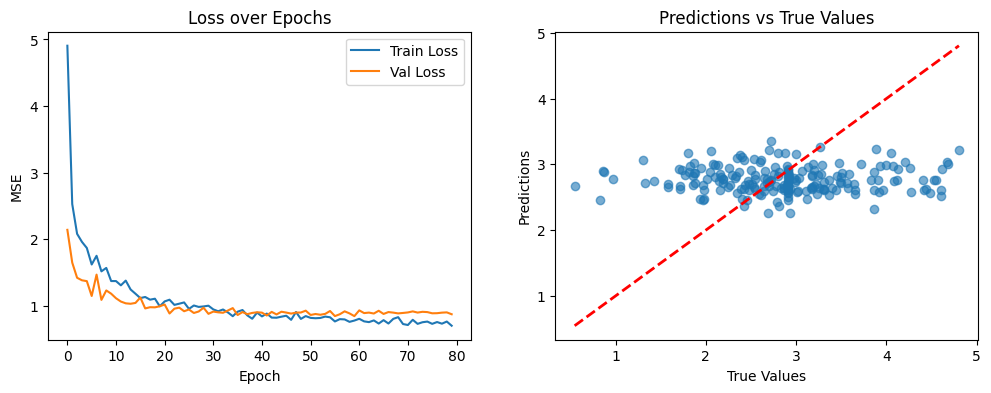

In [9]:
y_pred = model.predict(X_test_scaled).flatten()

# Расчёт метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


# Вывод результатов
print("Метрики качества модели:")
print(f"MAE (Средняя абсолютная ошибка):      {mae:.4f}")
print(f"MSE (Средняя квадратичная ошибка):       {mse:.4f}")
print(f"RMSE (Корень из MSE):                  {rmse:.4f}")
print(f"R² (Коэффициент детерминации):         {r2:.4f}")


# Визуализация: история обучения
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()


# Визуализация: предсказания vs истинные значения
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

# Сохранение модели

In [10]:
model.save('tuned_model.keras')
print("Обученная модель сохранена как 'tuned_model.keras'")

Обученная модель сохранена как 'tuned_model.keras'
